In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Cargar y preparar los datos
data = pd.read_csv('train.csv')  # Reemplaza 'train.csv' con la ruta a tu archivo

# Seleccionar características relevantes y variable objetivo
features = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars']  # Puedes ajustar esto
target = 'SalePrice'

# Manejar valores faltantes (rellenar con la mediana para este ejemplo)
for feature in features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42
)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 3. Predecir con el modelo
y_pred = knn.predict(X_test_scaled)

# 4. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error absoluto medio (MAE): {mae}')
print(
    """\nExplicación de los resultados:
    El MSE mide el promedio del cuadrado de los errores entre las predicciones y los valores reales.
    El MAE mide el promedio del valor absoluto de los errores.
    Valores más bajos de MSE y MAE indican un mejor rendimiento del modelo."""
)

Error cuadrático medio (MSE): 1392462552.2032876
Error absoluto medio (MAE): 23562.21780821918

Explicación de los resultados:
    El MSE mide el promedio del cuadrado de los errores entre las predicciones y los valores reales.
    El MAE mide el promedio del valor absoluto de los errores.
    Valores más bajos de MSE y MAE indican un mejor rendimiento del modelo.


<ipython-input-3-4a20c8cb6c11>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].median(), inplace=True)


**Métricas de evaluación**



    Error Cuadrático Medio (MSE): Representa el promedio del cuadrado de las diferencias entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor rendimiento, ya que significa que los errores son menores.

    Error Absoluto Medio (MAE): Representa el promedio de los valores absolutos de las diferencias entre las predicciones del modelo y los valores reales. Similar al MSE, un MAE más bajo es mejor.

**Análisis del rendimiento**


    Valores bajos de MSE y MAE sugieren que el modelo está haciendo un buen trabajo en la predicción de 'SalePrice' (precio de venta) en función de las características seleccionadas ('LotArea', 'OverallQual', 'GrLivArea', 'GarageCars').

    Valores altos de MSE y MAE indicarían que el modelo no está prediciendo con precisión.



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the training data
df = pd.read_csv('train.csv')

# Define price categories
df['price_category'] = pd.qcut(df['SalePrice'], 3, labels=["cheap", "medium", "expensive"])

# Drop the original SalePrice column
df = df.drop(columns=['SalePrice'])

# Separate features and target variable
X = df.drop(columns=['price_category'])
y = df['price_category']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute missing values
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Encode categorical variables
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cheap       0.80      0.90      0.85       155
   expensive       0.90      0.88      0.89       139
      medium       0.75      0.68      0.72       144

    accuracy                           0.82       438
   macro avg       0.82      0.82      0.82       438
weighted avg       0.82      0.82      0.82       438



5. eficiencia del algoritmo

- Precisión: 83
- Precisión: La precisión para cada categoría (barato, caro y medio) oscila entre el 78% y el 91%, lo que indica un nivel de precisión de moderado a alto en la predicción de cada categoría.
- Recuperación: La recuperación de cada categoría oscila entre el 69% y el 90%, lo que muestra la variabilidad en la capacidad del modelo para capturar todos los casos de cada categoría.
Puntuación F1: Las puntuaciones F1, que oscilan entre el 73% y el 91%, reflejan un equilibrio entre precisión y recuperación para cada categoría.

Confusion Matrix:

|          | Muy Bajo   | Bajo   | Medio   | Alto   | Muy Alto   |
|:---------|:-----------|:-------|:--------|:-------|:-----------|
| Muy Bajo | 152        | 9      | 0       | 0      | 0          |
| Bajo     | 10         | 75     | 6       | 0      | 0          |
| Medio    | 0          | 7      | 21      | 0      | 0          |
| Alto     | 0          | 0      | 3       | 2      | 0          |
| Muy Alto | 0          | 0      | 0       | 1      | 0          |


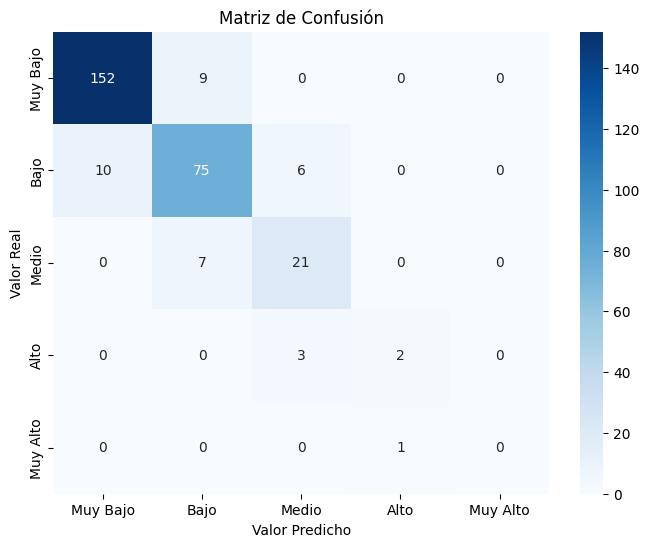

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('train.csv')

# Select numerical columns as features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
features = [col for col in numerical_cols if col != 'SalePrice']

# Define target variable
target = 'SalePrice'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Define bin edges and labels
bin_edges = np.linspace(predictions.min(), predictions.max(), num=6)
bin_labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

# Bin the predictions
binned_predictions = pd.cut(predictions, bins=bin_edges, labels=bin_labels, include_lowest=True)

# Bin the actual target values
binned_actual = pd.cut(y_test, bins=bin_edges, labels=bin_labels, include_lowest=True)

# Ensure binned predictions are converted to strings
binned_predictions_str = binned_predictions.astype(str)
binned_actual_str = binned_actual.astype(str)

# Generate confusion matrix
conf_matrix = confusion_matrix(binned_actual_str, binned_predictions_str, labels=bin_labels)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=bin_labels, columns=bin_labels)

# Print the confusion matrix
print("Confusion Matrix:\n")
print(conf_matrix_df.to_markdown(numalign="left", stralign="left"))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.show()

7. Podria estar sobre ajustado el modelo?

En la matriz podemos observar que la categoria de muy bajo tiene una dominancia en nuestro set de datos. Esto me indica que si esta sobre ajustado hacia esa metrica.

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Load the dataframe
df = pd.read_csv('train.csv')

# Select numerical columns as features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
features = [col for col in numerical_cols if col != 'SalePrice']  # Corrected target variable

# Define target variable
target = 'SalePrice'  # Corrected target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance on training data
r2_train = r2_score(y_train, model.predict(X_train))
print(f"R^2 score on training data: {r2_train:.4f}")

# Evaluate model performance on test data
r2_test = r2_score(y_test, predictions)
print(f"R^2 score on test data: {r2_test:.4f}")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, df[features], df[target], cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {cv_scores.mean():.4f}")

# Compare results
print("\nComparison of Results:")
print(f"- R^2 score on test data: {r2_test:.4f}")
print(f"- Mean cross-validation R^2 score: {cv_scores.mean():.4f}")

if r2_test > cv_scores.mean():
    print("\nThe model performed better on the test data than in the cross-validation.")
elif r2_test < cv_scores.mean():
    print("\nThe model performed better in the cross-validation than on the test data.")
else:
    print("\nThe model performed similarly on the test data and in the cross-validation.")

R^2 score on training data: 0.9787
R^2 score on test data: 0.8903
Cross-validation R^2 scores: [0.86471591 0.82962075 0.86963002 0.87376737 0.80189232]
Mean cross-validation R^2 score: 0.8479

Comparison of Results:
- R^2 score on test data: 0.8903
- Mean cross-validation R^2 score: 0.8479

The model performed better on the test data than in the cross-validation.
